## Importing Libraries and Data

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
test = "https://docs.google.com/spreadsheets/d/1_Aj4GhoxezvhKrQhirLA4pt-ovoHclXZ4w5JvPgSdHY/export?format=csv&gid=0"
data = pd.read_csv(test)

## Defining the simple moving averages and plotting crossover (2.a)
### Note: The x axis has the serial numbers

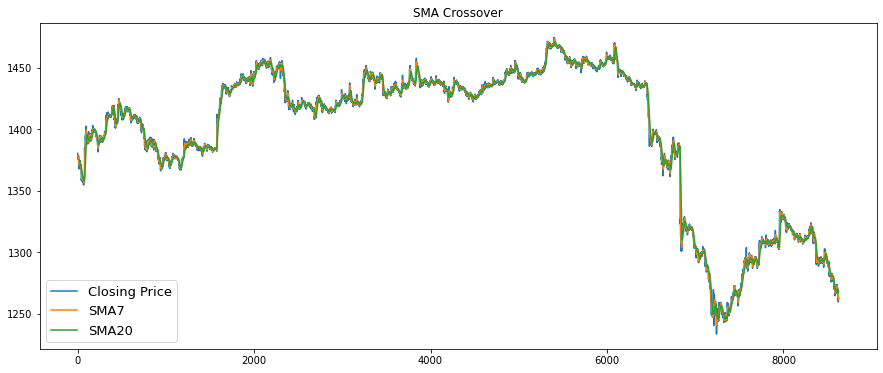

In [101]:
sma7 = data["close"].rolling(window=7).mean()
sma20 = data["close"].rolling(window=20).mean()
plt.figure(figsize=(15, 6))
plt.plot(data['close'], label='Closing Price')
plt.plot(sma7, label='SMA7')
plt.plot(sma20, label='SMA20')
plt.title("SMA Crossover")
plt.legend(loc='lower left', fontsize=13)

### Calculating pivots

In [ ]:
pivots=[]
range=[0,0,0]

for i in data.ser:
  range = range[1:]
  if i==0:
    range.append(data["close"][i])
    range = range[1:]
    range.append(data["high"][i])
    range = range[1:]
    range.append(data["low"][i])
    pivots.append((range[0]+range[1]+range[2])/3)
  else:
    range.append(data["close"][i-1])
    range = range[1:]
    range.append(data["high"][i])
    range = range[1:]
    range.append(data["low"][i])
    pivots.append((range[0]+range[1]+range[2])/3)

### Calculating S1

In [ ]:
s1=[]
ind=0
log=0
for i in pivots:
  s1.append((i*2)-data["high"][ind])
  ind=ind+1

## Defining the buy and sell conditions
### Note: The code below includes the stop loss and target conditions asked in 2.c

In [ ]:
log=0
profit=0
signal=0

for i in data.ser:
  if data["close"][i]>sma20[i] and data["close"][i]>s1[i] and signal==0:
    signal=1
    log=i
  elif data["close"][i]<sma20[i] and data["close"][i]<s1[i] and signal==1:
    signal=0
    profit = profit+data["close"][log]-data["close"][i]
    print("Profit made from trade " + str(counter) + "=" + str(data["close"][log]-data["close"][i]))
    counter+=1
  elif data["close"][i]>1.01*data["close"][log] and signal==1:
    signal=0
    profit = profit+data["close"][log]-data["close"][i]
    print("Profit made from trade " + str(counter) + "=" + str(data["close"][log]-data["close"][i]))
    counter+=1
  elif data["close"][i]<1.005*data["close"][log] and signal==1:
    signal=0
    profit = profit+data["close"][log]-data["close"][i]
    print("Profit made from trade " + str(counter) + "=" + str(data["close"][log]-data["close"][i]))
    counter+=1

### Printing the final profit

In [94]:
print("The total profit made by the strategy over the backtest is", profit)

The total profit made by the strategy over the backtest is 128.20000000000255
